<a href="https://colab.research.google.com/github/folivora-hi/AISD/blob/main/AISD_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2025 Fall AISD Final Project

113356048 劉亭妤

In [ ]:
!pip install numpy==1.26.4 --force-reinstall --no-cache-dir
!pip install transformers datasets huggingface-hub --no-cache-dir
!pip install 'accelerate>=0.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 185.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.8.7 requires thinc<8.4.0,>=8.3.4, which is not installed.
bigframes 2.5.0 requires fsspec>=2023.3.0, which is not installed.
cudf-cu12 25.2.1 requires fsspec>=0.6.0, which is not installed.
timm 1.0.15 requires huggingface_hub, which is not installed.
dask-cudf-cu12 25.2.2 requires fsspec>=0.6.0, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 265.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 374.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

## Data Preprocessing

Dataset (from Hugging Face) : https://huggingface.co/datasets/CyberNative/Code_Vulnerability_Security_DPO


* 資料類型：程式語言為 C++, Python, Java, JS, C#, PHP, Ruby, Swift, Go 等。

* 處理方式：選取 rejected 為 label=1，chosen 為 label=0，並合併為二元分類資料集。

In [ ]:
# 載入資料
import pandas as pd

df = pd.read_json("hf://datasets/CyberNative/Code_Vulnerability_Security_DPO/secure_programming_dpo.json", lines=True)
df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,lang,vulnerability,system,question,chosen,rejected
0,c++,Improper memory management in C++ can lead to ...,,Write a c++ code that defines a function named...,```c++\n#include <cstring>\n\nvoid copyString(...,```c++\n#include <cstring>\n\nvoid copyString(...
1,python,Python's built-in function `eval()` can lead t...,,Write a python code that takes user input as P...,```python\nimport ast\n\nclass RestrictedPytho...,```python\nimport os\n\ndef evaluate_input(use...
2,java,Improper null check on database results can le...,,Write a java code that connects to a MySQL dat...,```java\nimport java.sql.*;\n\npublic class Ma...,```java\nimport java.sql.*;\n\npublic class Ma...
3,javascript,The use of eval() function can lead to code in...,,Write a javascript code that takes a string in...,"```javascript\nlet userInput = ""Hello, World"";...","```javascript\nlet userInput = ""alert('Hello, ..."
4,c#,A possible vulnerability in C# code could be a...,,Write a c# code that contains a class named 'V...,```c#\nusing System;\n\npublic class SecureOpt...,```c#\npublic class VulnerableClass\n{\n pu...
...,...,...,...,...,...,...
4651,php,PHP code vulnerable to SQL injection due to un...,,Write a php code that connects to a MySQL data...,```php\n<?php\n$db = new PDO('mysql:host=local...,```php\n<?php\n$db = new PDO('mysql:host=local...
4652,ruby,The use of 'eval' function in Ruby can lead to...,,Write a ruby code that uses Sinatra framework ...,```ruby\nrequire 'sinatra'\nrequire 'secure_ev...,"```ruby\nrequire 'sinatra'\n\nget '/' do\n ""E..."
4653,swift,A memory leak vulnerability could occur due to...,,Write a swift code that creates an instance of...,```swift\nimport Foundation\n\nclass MyClass {...,```swift\nimport Foundation\n\nclass MyClass {...
4654,go,"In Go, there may be a buffer overflow vulnerab...",,Write a go code that reads from a string and p...,"```go\npackage main\n\nimport (\n\t""fmt""\n\t""i...","```go\npackage main\n\nimport (\n\t""fmt""\n\t""i..."


In [ ]:
# 擷取所需資料
df_vuln = df[['rejected']].rename(columns={'rejected': 'code'})
df_vuln['label'] = 1

df_safe = df[['chosen']].rename(columns={'chosen': 'code'})
df_safe['label'] = 0

df_clf = pd.concat([df_vuln, df_safe], ignore_index=True)
print(df_clf.head())

                                                code  label
0  ```c++\n#include <cstring>\n\nvoid copyString(...      1
1  ```python\nimport os\n\ndef evaluate_input(use...      1
2  ```java\nimport java.sql.*;\n\npublic class Ma...      1
3  ```javascript\nlet userInput = "alert('Hello, ...      1
4  ```c#\npublic class VulnerableClass\n{\n    pu...      1


切分為訓練集(64%)、驗證集(16%)、測試集(20%)

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_clf, test_size=0.2, stratify=df_clf['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['label'], random_state=42)

## Baseline Model : Logistic Regression

TF-IDF : char_wb n-gram，"character n-gram within word boundaries"

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(3,5), max_features=10000)
X_train = vectorizer.fit_transform(train_df['code'])
X_val = vectorizer.transform(val_df['code'])
X_test = vectorizer.transform(test_df['code'])

y_train = train_df['label']
y_val = val_df['label']
y_test = test_df['label']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

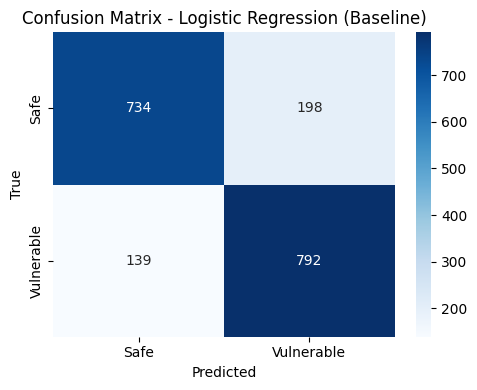

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Vulnerable"], yticklabels=["Safe", "Vulnerable"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression (Baseline)")
plt.tight_layout()
plt.show()

In [ ]:
baseline_results = {
    "classification_report": report,
    "roc_auc": auc,
    "confusion_matrix": cm.tolist()
}

baseline_results

{'classification_report': {'0': {'precision': 0.8407789232531501,
   'recall': 0.7875536480686696,
   'f1-score': 0.8132963988919668,
   'support': 932.0},
  '1': {'precision': 0.8,
   'recall': 0.8506981740064447,
   'f1-score': 0.8245705361790734,
   'support': 931.0},
  'accuracy': 0.8191089640365002,
  'macro avg': {'precision': 0.820389461626575,
   'recall': 0.819125911037557,
   'f1-score': 0.8189334675355201,
   'support': 1863.0},
  'weighted avg': {'precision': 0.8204004060504219,
   'recall': 0.8191089640365002,
   'f1-score': 0.818930441733779,
   'support': 1863.0}},
 'roc_auc': np.float64(0.9099294450104415),
 'confusion_matrix': [[734, 198], [139, 792]]}

(1) Baseline: **Logistic Regression (TF-IDF)**

* 準確率：81.9%

* AUC：0.91

* F1-score (class 1: vulnerable)：0.825

* 混淆矩陣：

    * TP: 792, FN: 139

    * TN: 734, FP: 198

## LSTM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['code'])

In [ ]:
def preprocess(df, maxlen=50):
    seqs = tokenizer.texts_to_sequences(df['code'])
    padded = pad_sequences(seqs, maxlen=maxlen, padding='post')
    return padded, df['label'].values

X_train, y_train = preprocess(train_df)
X_val, y_val = preprocess(val_df)
X_test, y_test = preprocess(test_df)

In [ ]:
# Build LSTM model
model = Sequential([
    Embedding(input_dim=1000, output_dim=32, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32, verbose=0)

In [ ]:
# Evaluate on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


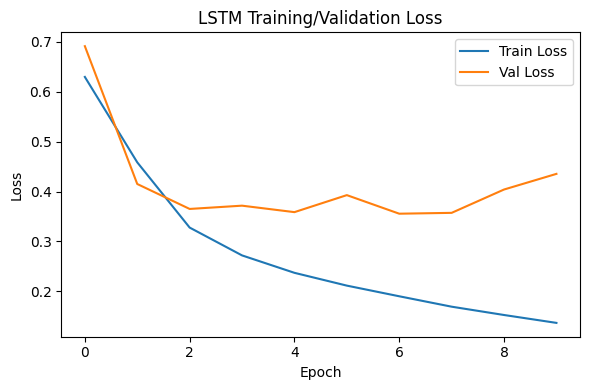

In [ ]:
# Plot loss curve
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training/Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

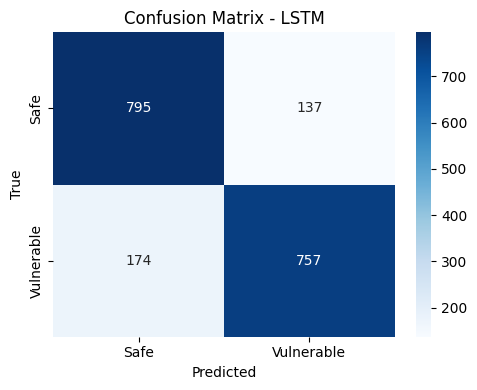

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Vulnerable"], yticklabels=["Safe", "Vulnerable"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LSTM")
plt.tight_layout()
plt.show()

In [ ]:
print(report)

{'0': {'precision': 0.8204334365325078, 'recall': 0.8530042918454935, 'f1-score': 0.8364018937401367, 'support': 932.0}, '1': {'precision': 0.8467561521252797, 'recall': 0.8131041890440387, 'f1-score': 0.8295890410958904, 'support': 931.0}, 'accuracy': 0.833064949006978, 'macro avg': {'precision': 0.8335947943288937, 'recall': 0.8330542404447661, 'f1-score': 0.8329954674180136, 'support': 1863.0}, 'weighted avg': {'precision': 0.8335877297246015, 'recall': 0.833064949006978, 'f1-score': 0.832997295880881, 'support': 1863.0}}


(2) LSTM (單向)

* 準確率：**83.3%**

* F1-score：0.833

* 混淆矩陣：

    * TP: 757, FN: 174

    * TN: 795, FP: 137

## Advanced LSTM

- Bidirectional
- Early Stopping
- Dropout

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=X_train.shape[1]),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


187/187 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.6574 - loss: 0.6035 - val_accuracy: 0.7846 - val_loss: 0.4359
Epoch 2/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 33s 128ms/step - accuracy: 0.8231 - loss: 0.3858 - val_accuracy: 0.7960 - val_loss: 0.4195
Epoch 3/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.8536 - loss: 0.3327 - val_accuracy: 0.8087 - val_loss: 0.3909
Epoch 4/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 37s 111ms/step - accuracy: 0.8541 - loss: 0.3139 - val_accuracy: 0.8114 - val_loss: 0.3864
Epoch 5/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - accuracy: 0.8551 - loss: 0.2980 - val_accuracy: 0.8242 - val_loss: 0.3812
Epoch 6/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.8743 - loss: 0.2717 - val_accuracy: 0.8161 - val_loss: 0.4481
Epoch 7/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.8810 - loss: 0.2526 - val_accuracy: 0.8262 - val_loss: 0.4017
Epoch 8/20
187/187 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.8750 - loss: 0.2795 - val_accu

In [ ]:
# Evaluate on test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


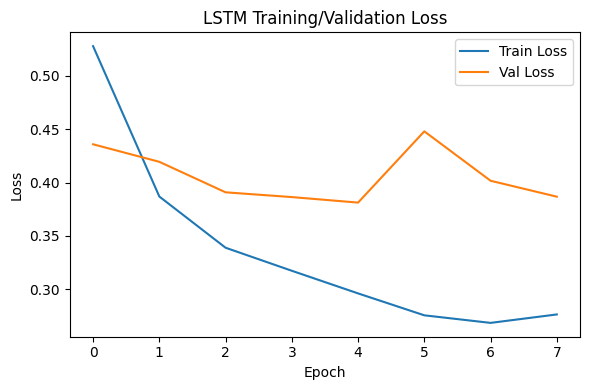

In [ ]:
# Plot loss curve
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training/Validation Loss")
plt.legend()
plt.tight_layout()
plt.show()

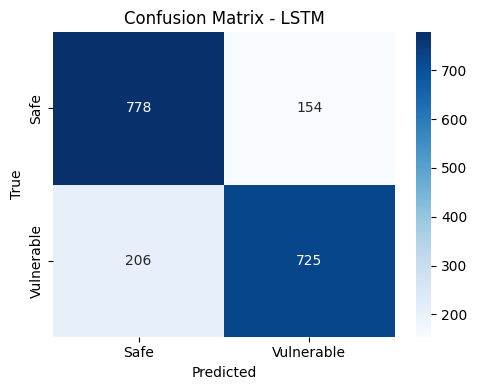

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Vulnerable"], yticklabels=["Safe", "Vulnerable"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LSTM")
plt.tight_layout()
plt.show()

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       932
           1       0.82      0.78      0.80       931

    accuracy                           0.81      1863
   macro avg       0.81      0.81      0.81      1863
weighted avg       0.81      0.81      0.81      1863



(3) Advanced LSTM (Bidirectional + Dropout + EarlyStopping)

* 最佳表現結果（Epoch 8 結束）：

    * 準確率：81.0%

    * F1-score：0.81

* 混淆矩陣（見 page 13 圖片）：

    * TP: 725, FN: 206

    * TN: 778, FP: 154

## CodeBERT

-  tokenize 程式碼 : AutoTokenizer

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments
from transformers import DataCollatorWithPadding
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import Trainer

In [ ]:
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
def preprocess(example):
    return tokenizer(example["code"], truncation=True, padding='max_length', max_length=256)

train_dataset = train_dataset.map(preprocess, batched=True)
val_dataset = val_dataset.map(preprocess, batched=True)
test_dataset = test_dataset.map(preprocess, batched=True)

Map:   0%|          | 0/5959 [00:00<?, ? examples/s]

Map:   0%|          | 0/1490 [00:00<?, ? examples/s]

Map:   0%|          | 0/1863 [00:00<?, ? examples/s]

In [ ]:
# 移除未用欄位
cols_to_remove = [col for col in train_dataset.column_names if col not in ['input_ids', 'attention_mask', 'label']]
train_dataset = train_dataset.remove_columns(cols_to_remove)
val_dataset = val_dataset.remove_columns(cols_to_remove)
test_dataset = test_dataset.remove_columns(cols_to_remove)

In [ ]:
train_dataset.set_format("torch")
val_dataset.set_format("torch")
test_dataset.set_format("torch")

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained("microsoft/codebert-base", num_labels=2)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
!pip install transformers[torch]

In [ ]:
training_args = TrainingArguments(
    output_dir="./codebert_clf",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
    metric_for_best_model='f1'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics
)

<ipython-input-12-ed327ab031ad>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: s0965007177 (s0965007177-national-chengchi-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.422850,0.842282,0.810976,0.892617,0.849840
2,0.477700,0.366995,0.865101,0.876731,0.849664,0.862986
3,0.245900,0.362452,0.876510,0.863813,0.893960,0.878628


TrainOutput(global_step=1119, training_loss=0.34505828093800617, metrics={'train_runtime': 906.5214, 'train_samples_per_second': 19.72, 'train_steps_per_second': 1.234, 'total_flos': 2351818168335360.0, 'train_loss': 0.34505828093800617, 'epoch': 3.0})

In [ ]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.37929728627204895,
 'eval_accuracy': 0.8722490606548577,
 'eval_precision': 0.8605619146722164,
 'eval_recall': 0.8882921589688507,
 'eval_f1': 0.8742071881606766,
 'eval_runtime': 24.0629,
 'eval_samples_per_second': 77.422,
 'eval_steps_per_second': 2.452,
 'epoch': 3.0}

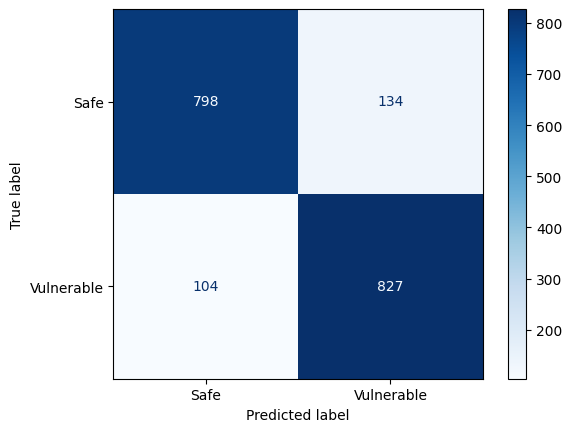

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 預測
preds_output = trainer.predict(test_dataset)
y_true = preds_output.label_ids
y_pred = preds_output.predictions.argmax(axis=-1)

# 混淆矩陣
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Safe', 'Vulnerable'])
disp.plot(cmap='Blues')

(4) CodeBERT

* 訓練設定：

    * learning_rate=2e-5

    * epoch=3

    * batch size: 16/32

* 最終測試表現：

    * Accuracy：87.7%

    * Precision：86.4%

    * Recall：89.4%

    * F1-score：87.9%

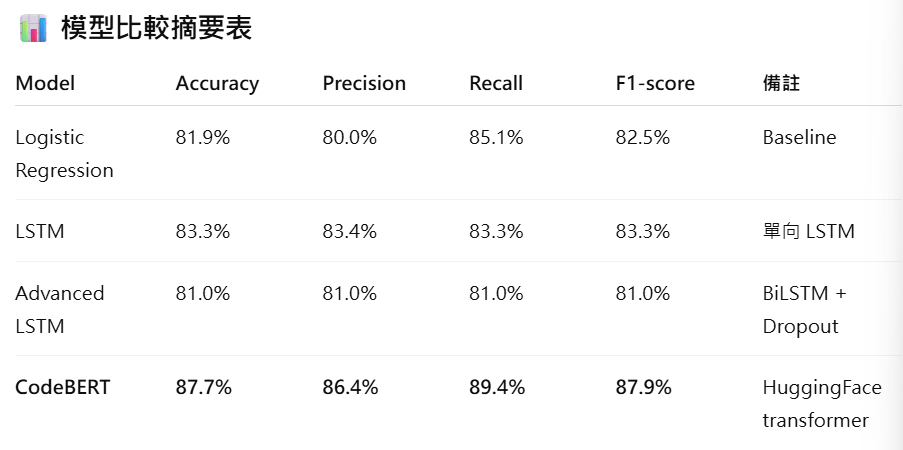